In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.layouts import row
from distributed.utils import palette
from pyasn1_modules.rfc2985 import gender
from sqlalchemy import custom_op

path_avg_transaction = '''/Users/ricky/Downloads/DATA ANALYST BOOSTCAMP/Booscamp DATA/Mathematic/Industry Project/Bank/datasets/avg_transactions_after_campaign.csv'''
path_credit_profile = '''/Users/ricky/Downloads/DATA ANALYST BOOSTCAMP/Booscamp DATA/Mathematic/Industry Project/Bank/datasets/credit_profiles.csv'''
path_customers = '/Users/ricky/Downloads/DATA ANALYST BOOSTCAMP/Booscamp DATA/Mathematic/Industry Project/Bank/datasets/customers.csv'
path_transactions = '''/Users/ricky/Downloads/DATA ANALYST BOOSTCAMP/Booscamp DATA/Mathematic/Industry Project/Bank/datasets/transactions.csv'''
df_transactions = pd.read_csv(path_transactions)
df_avg_transactions = pd.read_csv(path_avg_transaction)
df_credit_profile = pd.read_csv(path_credit_profile)
df_customers = pd.read_csv(path_customers)


<h2 align='center' style='color:'purple' h2> Working with dataset

### <center> I.Customer tables </center>
### <center> 1.Explore customers - annual income </center>

In [5]:
df_customers.shape

(1000, 8)

In [6]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cust_id         1000 non-null   int64  
 1   name            1000 non-null   object 
 2   gender          1000 non-null   object 
 3   age             1000 non-null   int64  
 4   location        1000 non-null   object 
 5   occupation      1000 non-null   object 
 6   annual_income   950 non-null    float64
 7   marital_status  1000 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


In [7]:
df_customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


### The table above showed the problems of max and min value from age and annual income value. So that we need to determine the outliers of 2 this columns after get rid of null value

In [8]:
df_customers.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


### 1.2 Get rid of null value for dataset annual income

In [9]:
#Check if any null value
df_customers.isna().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [154]:
df_customers[df_customers['annual_income'].isna()].head(5)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
14,15,Sanjana Malik,Female,25.0,Rural,Artist,NaN,Married,18-25
82,83,Reyansh Mukherjee,Male,27.0,City,Freelancer,NaN,Single,26-48
97,98,Virat Puri,Male,47.0,Suburb,Business Owner,NaN,Married,26-48
102,103,Aarav Shah,Male,32.0,City,Data Scientist,NaN,Married,26-48
155,156,Kiaan Saxena,Male,24.0,City,Fullstack Developer,NaN,Married,18-25


In [11]:
# To replace null value from annual income, we decide to replace by median income of each occupation is a better way. Because we realise the outliers is existed in data set and  if replace income which null value by average, it should not be accurate. 
# Set up get median income of each occupation
df_get_median_annual_income_from_occupation = df_customers.groupby('occupation')['annual_income'].median()
df_get_median_annual_income_from_occupation

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [12]:
#Test annual income when pass occupation name in dataframe 
df_get_median_annual_income_from_occupation['Freelancer']

46759.0

In [13]:
#Set up function to try to retrieve the annual income whenever pass each occupation which corresponding with position of annual income is null.
#The meaning of this function is when we use row which represent for a whole row of dataset, we may call any rows of column name to get value, then get back value annual income from the dataset : df_get_median_annual_income_from_occupation above.
def get_income_na(row):
    if pd.isnull(row['annual_income']):
        return df_get_median_annual_income_from_occupation[row['occupation']]
    else :
        return row['annual_income']


In [14]:
# Test call function get_income_na when pass row is the dist include annual income is null and 1 name of occupation to get the value
get_income_na({'annual_income':None, "occupation":'Freelancer'})

46759.0

In [15]:
#Manipulate to this function to get the new column which replace any annual null income . Look parallel the income null and replace by occupation representative. Using row which represent for a whole row of dataset.
df_customers['annual_income'] = df_customers.apply(lambda row: df_get_median_annual_income_from_occupation[row['occupation']] 
                                                    if pd.isnull(row['annual_income']) else row['annual_income'], axis=1 )

In [16]:
#Check if any null value still 
df_customers.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [17]:
df_customers[df_customers['annual_income'].isna()]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


### 1.3 Determine outliers of annual income
#### The confirmation for minimum annual income is 100

In [18]:
df_customers[df_customers['annual_income']<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [19]:
#Check the annual income which less than minimum income 100000
df_customers[df_customers['annual_income']<100].shape

(10, 8)

In [20]:
# We need to replace all this wrong number by annual income corresponding occupation


#### 1st Solution : Using row with lambda

In [21]:
df_customers['annual_income'] = df_customers.apply(lambda row: df_get_median_annual_income_from_occupation[row['occupation']] 
                                                    if (row['annual_income'] < 100) else row['annual_income'], axis=1)

#### 2nd Solution : Using interrows and df.at

In [22]:
df_customers.at[6 , 'gender']

'Female'

In [23]:

for index, row in df_customers.iterrows():
    if row['annual_income']<100:
        df_customers.at[index, 'annual_income'] = df_get_median_annual_income_from_occupation[row['occupation']]
        
    

In [24]:
df_customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,140483.548500
std,288.819436,15.666155,110463.002934
min,1.000000,1.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,46.000000,195514.250000
max,1000.000000,135.000000,449346.000000


In [25]:
df_customers.iloc[[316,333]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
316,317,Yuvraj Saxena,Male,47,City,Consultant,58017.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,135759.0,Married


In [26]:
#Check higher limit 
income_mean = df_customers['annual_income'].mean()
income_std = df_customers['annual_income'].std()
higher_limit_income = income_mean + 3*income_std
higher_limit_income


471872.5573024922

The higher limit income is greater than max annual income so that dont have outliers for max annual income

### 1.4 Data visualization annual income

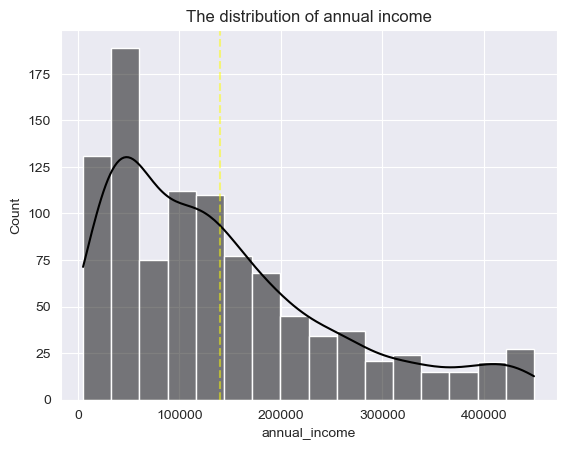

In [27]:
sns.histplot(df_customers['annual_income'], color='black',kde=True)
plt.axvline(df_customers['annual_income'].mean(), color='yellow', linestyle='--', label='Mean', alpha=0.5)
plt.title('The distribution of annual income')
plt.show()

/var/folders/q3/xgl4pwjd7lbg8skj81tsl0xr0000gn/T/ipykernel_17788/3173385115.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df_customers['gender'], y = df_customers['annual_income'], palette='tab10')


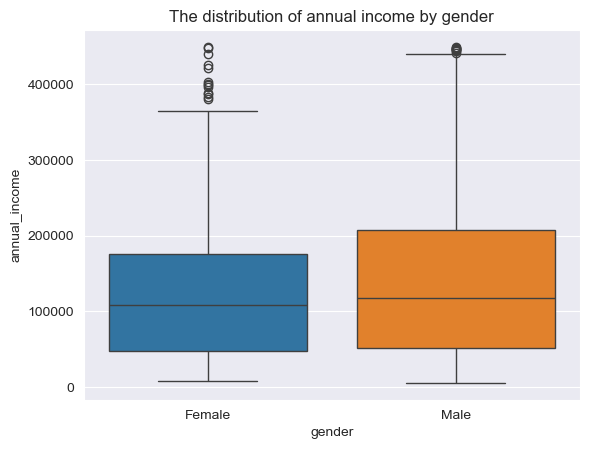

In [28]:
sns.boxplot(x = df_customers['gender'], y = df_customers['annual_income'], palette='tab10')
plt.title('The distribution of annual income by gender')
plt.show()

/var/folders/q3/xgl4pwjd7lbg8skj81tsl0xr0000gn/T/ipykernel_17788/1015977316.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = df_customers['annual_income'], x = df_customers['occupation'], palette='tab10', errorbar=None)
/var/folders/q3/xgl4pwjd7lbg8skj81tsl0xr0000gn/T/ipykernel_17788/1015977316.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


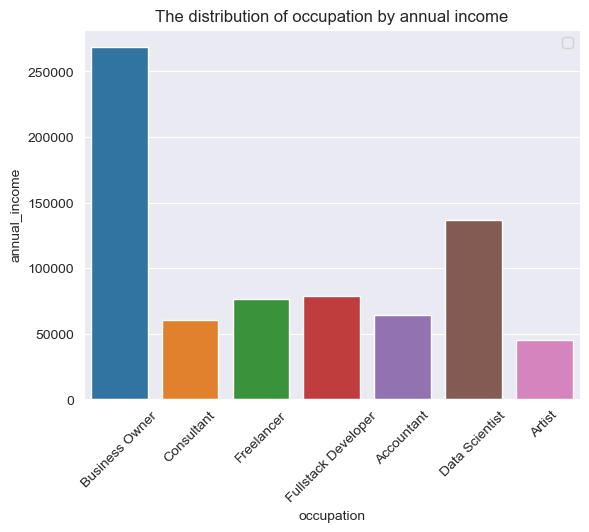

In [29]:
sns.barplot(y = df_customers['annual_income'], x = df_customers['occupation'], palette='tab10', errorbar=None)
plt.xticks(rotation=45)
plt.title('The distribution of occupation by annual income')
plt.legend()
plt.show()

In [30]:
#Arrange annual income 
df_income_occupation = df_customers.groupby(['occupation','gender'])['annual_income'].mean().reset_index().sort_values(by='annual_income', ascending=False)
df_income_occupation

,occupation,gender,annual_income
5,Business Owner,Male,273767.408213
4,Business Owner,Female,255017.512195
8,Data Scientist,Female,143047.171875
9,Data Scientist,Male,133807.450000
11,Freelancer,Male,81027.794872
12,Fullstack Developer,Female,79954.915254
13,Fullstack Developer,Male,77914.606742
1,Accountant,Male,67602.416667
10,Freelancer,Female,66143.555556
6,Consultant,Female,64203.312500


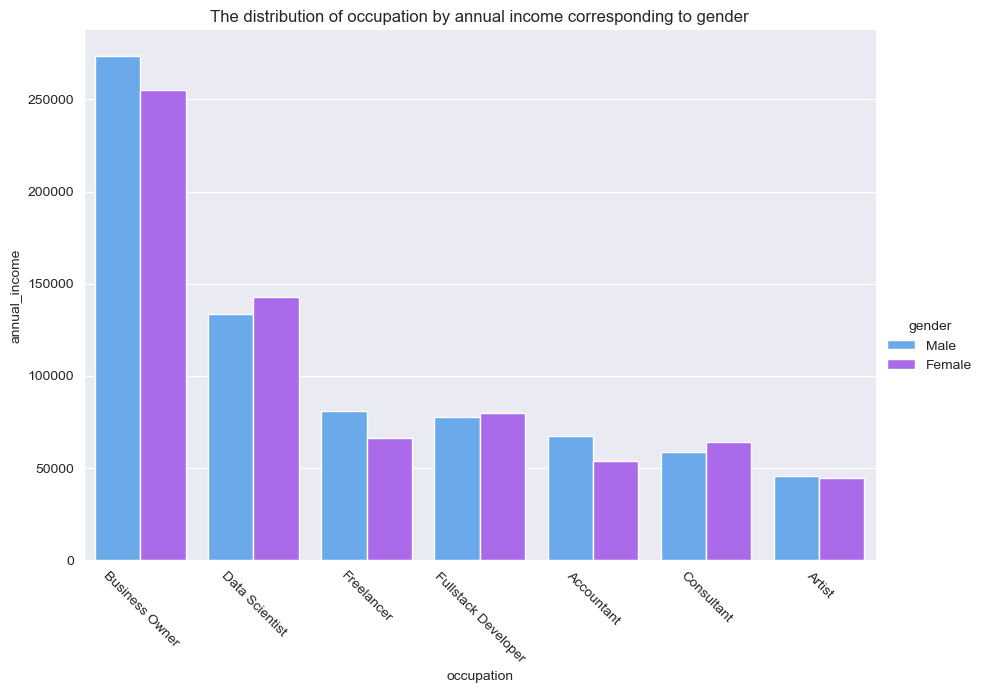

In [31]:

sns.catplot( df_income_occupation , 
             kind="bar", 
             x = 'occupation', 
             y = 'annual_income', 
             hue = 'gender', 
             errorbar=None, 
             palette = 'cool',
             height=6,
             aspect=1.5
             )
plt.xticks(rotation=-45)
plt.title('The distribution of occupation by annual income corresponding to gender')
plt.show()

In [32]:
list_factor = ['gender', 'location','occupation', 'marital_status']

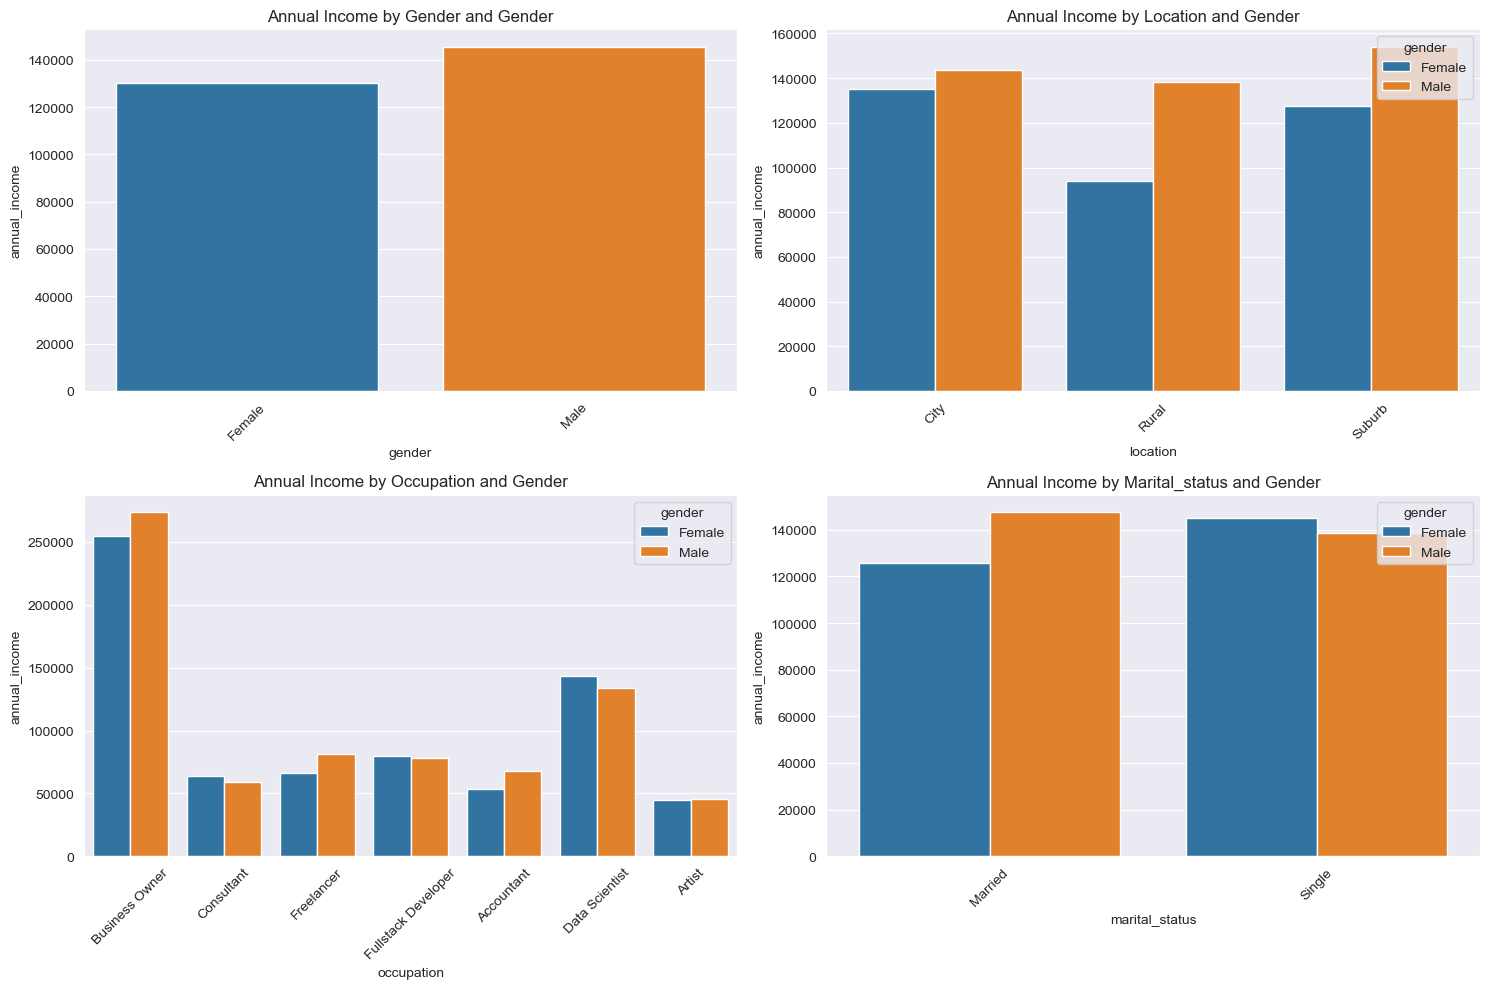

In [33]:

# Set up the number of rows and columns for subplots (2x2 grid in this case)
n_rows = 2
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each factor as a separate bar chart with 'gender' as hue
for idx, factor in enumerate(list_factor):
    sns.barplot(
        data=df_customers,
        x=factor,
        y='annual_income',
        hue='gender',  # Add hue for gender comparison
        palette='tab10',
        ax=axes[idx],
        errorbar=None
    )
    axes[idx].set_title(f'Annual Income by {factor.capitalize()} and Gender')
    axes[idx].tick_params(axis='x', rotation=45)

# Hide any empty subplots if the number of factors is less than grid size
for j in range(len(list_factor), n_rows * n_cols):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## <center>  2. Explore customers - Age </center>

In [124]:
df_customers['age'].describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

In [125]:
# Check if any null value in age column ?
df_customers.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

#### The business manager has told me that age is valid only if it is between 15 and 80 years.

In [126]:
#Findout the data of range age 15-80
df_customers[(df_customers['age']<15) | (df_customers['age']>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [127]:
df_customers[(df_customers['age']<15) | (df_customers['age']>80)].shape

(20, 8)

#### Replace the wrong value in age column
#### Solution 1

In [128]:
df_get_median_age = df_customers.groupby('occupation')['age'].median()
df_get_median_age

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [130]:
df_customers['age'] = df_customers.apply(lambda row: df_get_median_age[row['occupation']]
                                         if (row['age'] < 15) or (row['age'] > 80) else row['age'], axis=1 )
                                       

In [131]:
df_customers.iloc[[174,222]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
174,175,Rohan Sharma,Male,24.0,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,24.0,Suburb,Freelancer,210987.0,Married


In [132]:
#check if any wrong numbers
df_customers[(df_customers['age']<15) | (df_customers['age']>80)].shape

(0, 8)

#### Solution 2

In [42]:
for index, row in df_customers.iterrows():
    if ( row['age'] < 15 or row['age'] > 80):
        df_customers.at[index, 'age'] = df_get_median_age[row['occupation']]

In [43]:
df_customers[(df_customers['age']<15) | (df_customers['age']>80)].shape

(0, 8)

In [133]:
df_customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,35.541500,139410.314737
std,288.819436,12.276634,112416.802007
min,1.000000,18.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,44.250000,193137.500000
max,1000.000000,64.000000,449346.000000


### 3. Analyze customer distribution per age group. Form the following age groups for your analysis,
    a. Youngsters: 18 to 25 years
    b. Mid age professionals: 26 to 48 years
    c. Seniors: 49 to 65 years

### Solution 1 : 

In [45]:
# df_customers['age_group'] = df_customers['age'].apply(lambda x : 'Youngsters' if 18 <= x <=25
#                                                                                else 'Mid age professionals' if 26 <= x <= 48
#                                                                                else 'Seniors' if 49 <= x <= 65 
#                                                                                 else 'unknow'  )
                              

#### Solution 2 : In term of finding the age group name

In [142]:
edge = [18,25,48,65]
label = ['18-25','26-48','49-65']
df_customers['age_group'] = pd.cut(df_customers['age'], bins=edge, labels=label)

In [47]:
df_customers.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


### Analyze age group

In [48]:
df_age = df_customers.groupby(['occupation', 'gender'])['age'].mean().reset_index().sort_values(by='age', ascending=False)
df_age

,occupation,gender,age
4,Business Owner,Female,49.682927
5,Business Owner,Male,49.429952
6,Consultant,Female,45.875000
7,Consultant,Male,45.292308
8,Data Scientist,Female,32.375000
1,Accountant,Male,32.250000
9,Data Scientist,Male,32.066667
0,Accountant,Female,30.500000
12,Fullstack Developer,Female,26.932203
13,Fullstack Developer,Male,26.657303


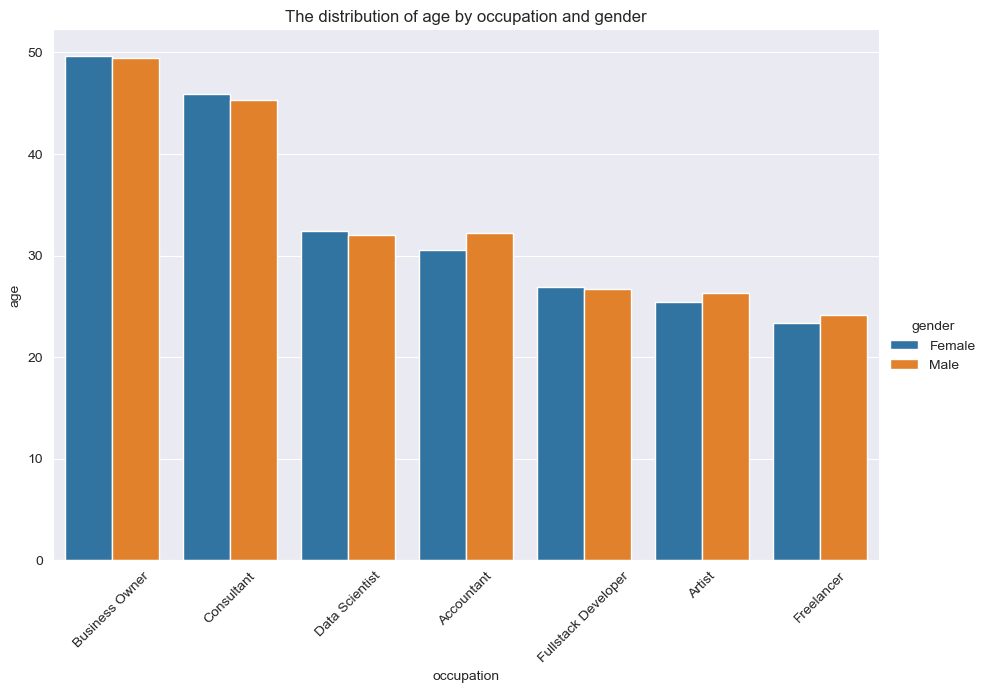

In [49]:
# Analyze age by occupation and gender
sns.catplot(df_age, kind='bar', x='occupation', y='age', hue='gender',palette='tab10', height=6, aspect=1.5)
plt.xticks(rotation=45)
plt.title('The distribution of age by occupation and gender')
plt.show()

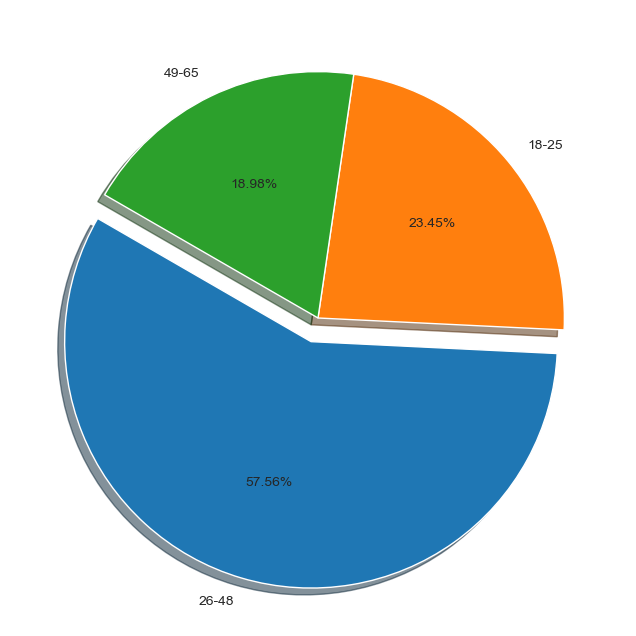

In [50]:
#Create the pie chart to compare the age group
df_age_group = df_customers['age_group'].value_counts()
plt.figure(figsize=(11, 8))
plt.pie(df_age_group, labels = df_age_group.index ,  startangle = 150, autopct='%1.2f%%', explode=(0.1,0,0), shadow=True)
plt.show()

### 4. Analyze customer distribution per location and gender

In [51]:
df_location_gender = df_customers.groupby('gender')['location'].value_counts().reset_index().sort_values(by='count', ascending=False)
df_location_gender

,gender,location,count
3,Male,City,457
0,Female,City,226
4,Male,Suburb,158
1,Female,Suburb,74
5,Male,Rural,59
2,Female,Rural,26


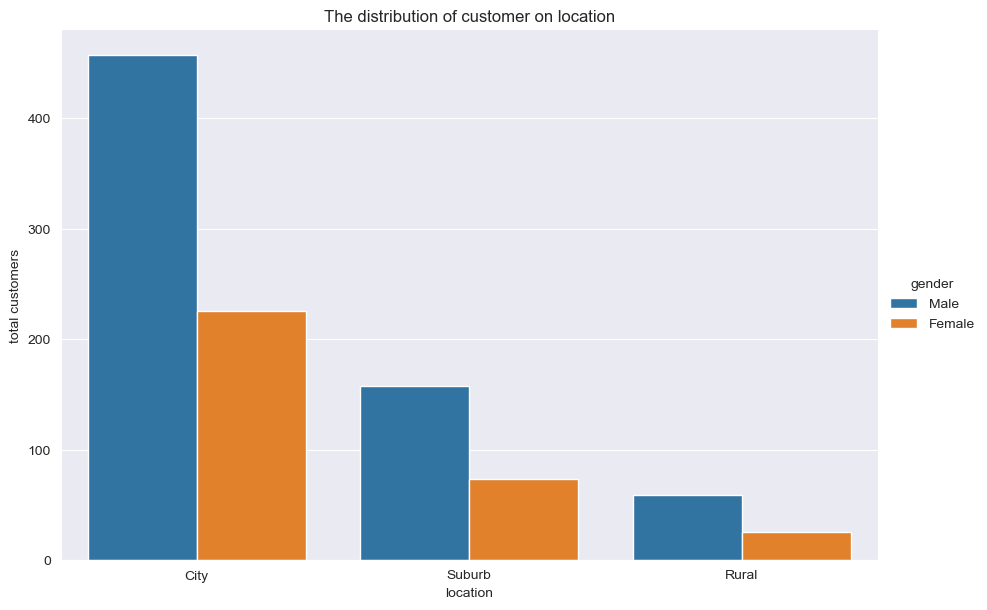

In [52]:
sns.catplot(df_location_gender,kind= 'bar', x ='location', y ='count', hue='gender', palette='tab10', height=6, aspect=1.5)
plt.title('The distribution of customer on location')
plt.ylabel('total customers')
plt.show()

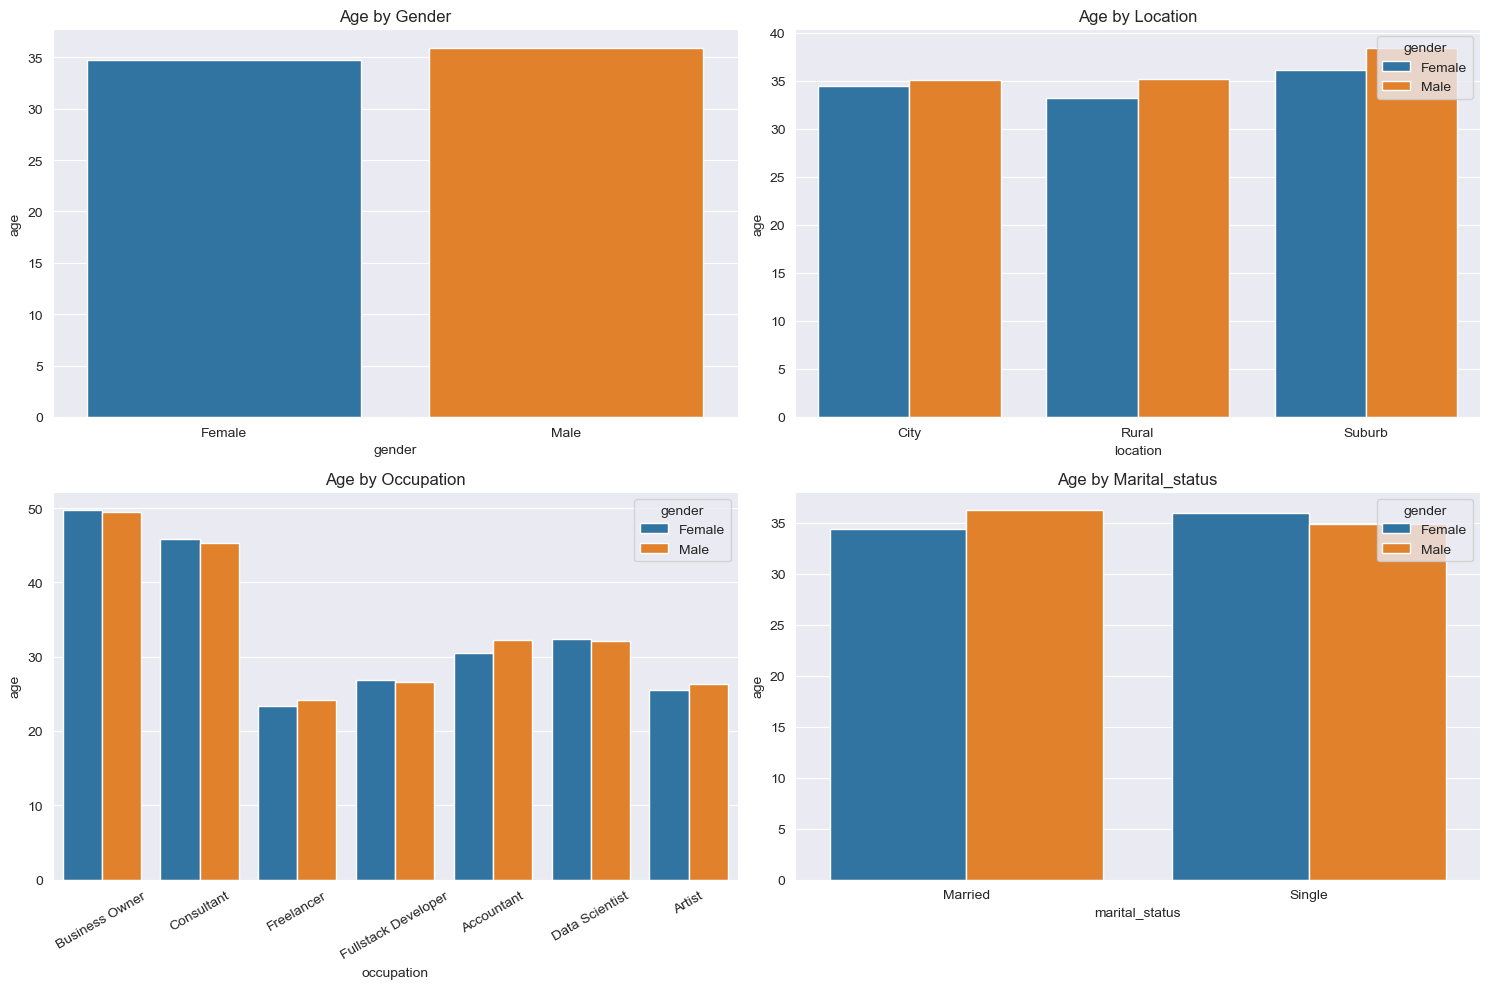

In [53]:
n_cols = 2
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()
for idx , factor in enumerate(list_factor):
    sns.barplot(
        df_customers,
        x = factor,
        y = 'age',
        hue = 'gender',
        palette = 'tab10',
        ax = axes[idx],
        errorbar = None
    )
    if factor =='occupation':
        axes[idx].tick_params(axis='x', rotation=30)
    axes[idx].set_title(f"Age by {factor.capitalize()}")
plt.tight_layout()
plt.show()

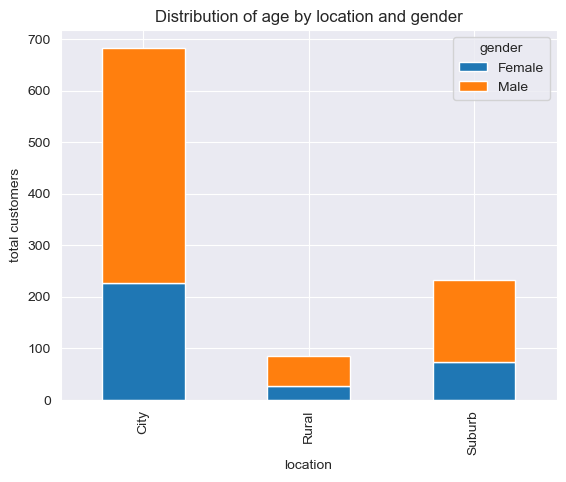

In [54]:
#stacked chart distribution age by gender on location
df_age_city_location = df_customers.groupby(['location','gender'])['age'].count().unstack('gender')
# df_age_city_location
df_age_city_location.plot(kind='bar', stacked=True, )
plt.ylabel('total customers')
plt.title('Distribution of age by location and gender')
plt.show()

## <center>Explore Credit profiles Tables</center>

In [55]:
df_credit_profile.shape

(1004, 6)

In [56]:
df_credit_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cust_id                         1004 non-null   int64  
 1   credit_score                    1004 non-null   int64  
 2   credit_utilisation              1000 non-null   float64
 3   outstanding_debt                1000 non-null   float64
 4   credit_inquiries_last_6_months  1000 non-null   float64
 5   credit_limit                    935 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 47.2 KB


In [57]:
df_credit_profile.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1004.000000,1004.000000,1000.000000,1000.000000,1000.000000,935.000000
mean,500.850598,588.655378,0.498950,9683.597000,1.955000,19235.561497
std,288.315670,152.575244,0.233139,25255.893671,1.414559,24489.997195
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000
25%,251.750000,459.000000,0.293917,221.000000,1.000000,750.000000
50%,502.500000,601.000000,0.487422,550.000000,2.000000,1250.000000
75%,749.250000,737.250000,0.697829,11819.500000,3.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000


#### Clean duplicated from customer id. Because we may see the count is 1004 but the max is 1000, that's mean this data has the duplicated data.

In [58]:
df_credit_profile[df_credit_profile['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [59]:
df_credit_profile_clean_dup=df_credit_profile.drop_duplicates(subset='cust_id', keep='last')


In [60]:
df_credit_profile_clean_dup[df_credit_profile_clean_dup['cust_id'].duplicated(keep=False)].shape

(0, 6)

In [61]:
df_credit_profile_clean_dup.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


#### Check if any null value in new data set

In [62]:
df_credit_profile_clean_dup.isna().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [63]:
df_credit_profile_clean_dup[df_credit_profile_clean_dup['credit_limit'].isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [64]:
df_credit_profile_clean_dup['credit_limit'].unique()

array([40000.,  1250.,  1000.,   500.,   750.,    nan,  1500., 60000.,
       20000.])

#### We know the credit score range are from 300-900. So that we will define the range of credit score corresponding with credit limit 

In [65]:
range_credit = [300,450,500,550,600,650,700,750,800]
labels_range_credit = [f"{range_credit[i]}-{range_credit[i+1]-1}" for i in range(len(range_credit) - 1)]
df_credit_profile_clean_dup.loc[:, 'credit_range'] = pd.cut(df_credit_profile_clean_dup['credit_score'], bins=range_credit, labels=labels_range_credit, right=False)

/var/folders/q3/xgl4pwjd7lbg8skj81tsl0xr0000gn/T/ipykernel_17788/2857584911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_credit_profile_clean_dup.loc[:, 'credit_range'] = pd.cut(df_credit_profile_clean_dup['credit_score'], bins=range_credit, labels=labels_range_credit, right=False)


In [66]:
df_credit_profile_clean_dup.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [67]:
get_value_credit_range = df_credit_profile_clean_dup.groupby('credit_range')['credit_limit'].median()
get_value_credit_range

/var/folders/q3/xgl4pwjd7lbg8skj81tsl0xr0000gn/T/ipykernel_17788/896319512.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  get_value_credit_range = df_credit_profile_clean_dup.groupby('credit_range')['credit_limit'].median()


credit_range
300-449      500.0
450-499      750.0
500-549     1000.0
550-599     1250.0
600-649     1500.0
650-699    20000.0
700-749    40000.0
750-799    60000.0
Name: credit_limit, dtype: float64

### Replace N/A from credit limit by taking the value from the credit range
#### Solution 1

In [68]:
get_value_credit_range['750-799']

60000.0

In [69]:
df_credit_profile_clean_dup['credit_limit']=df_credit_profile_clean_dup.apply(lambda row: get_value_credit_range[row['credit_range']]
                                                                              if pd.isnull(row['credit_limit']) else row['credit_limit'],axis=1 )
                                                                             

/var/folders/q3/xgl4pwjd7lbg8skj81tsl0xr0000gn/T/ipykernel_17788/965864600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_credit_profile_clean_dup['credit_limit']=df_credit_profile_clean_dup.apply(lambda row: get_value_credit_range[row['credit_range']]


In [70]:
df_credit_profile_clean_dup.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_range                      0
dtype: int64

In [71]:
df_credit_profile_clean_dup.loc[[954,957]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_range
954,951,513,0.175914,131.0,3.0,1000.0,500-549
957,954,783,0.867421,46451.0,0.0,60000.0,750-799


#### Check the outliers of this data set

In [72]:
df_credit_profile_clean_dup.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000


### The column outstanding_debt has issue because we may see the min, mean and std are very small than maximum debt, so that this has outliers value

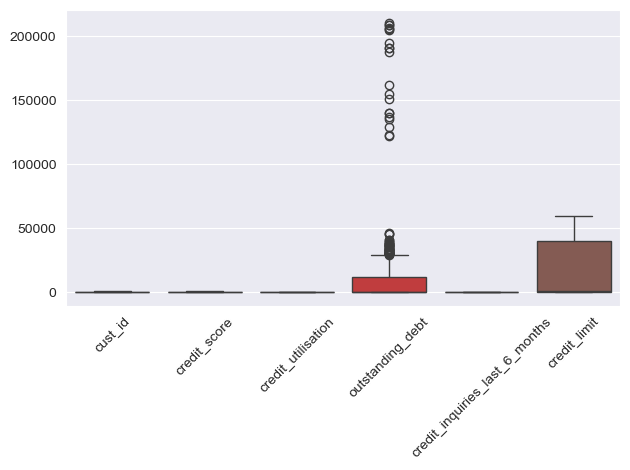

In [73]:
#Use boxplot to try to check firstly
sns.boxplot(df_credit_profile_clean_dup)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### The chart above showed that the outstanding_debt apparently outliers value
#### We need to talk with project manager about the outliers and been confirmed that that limit debt can not be greater than credit limit ---> So that we will replace any outliers which higher than credit limit by credit limit number 

In [74]:
df_credit_profile_clean_dup[df_credit_profile_clean_dup['outstanding_debt']> df_credit_profile_clean_dup['credit_limit']].shape

(20, 7)

In [75]:
df_credit_profile_clean_dup[df_credit_profile_clean_dup['outstanding_debt']> df_credit_profile_clean_dup['credit_limit']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_range
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
19,20,647,0.439132,205014.0,3.0,1500.0,600-649
25,26,758,0.250811,190838.0,2.0,60000.0,750-799
38,39,734,0.573023,122758.0,3.0,40000.0,700-749
93,94,737,0.739948,137058.0,2.0,40000.0,700-749
204,205,303,0.364360,187849.0,0.0,500.0,300-449
271,272,703,0.446886,154568.0,1.0,40000.0,700-749
301,302,722,0.608076,122402.0,4.0,40000.0,700-749
330,331,799,0.363420,208898.0,4.0,60000.0,750-799
350,351,320,0.285081,150860.0,0.0,500.0,300-449


#### Solution 1: Replace outliers value by apply lambda function

In [76]:
#Replace outliers from outstanding_debt by credit_limit
df_credit_profile_clean_dup['outstanding_debt'] = df_credit_profile_clean_dup.apply(lambda row: row['credit_limit']
                                                                                    if row['outstanding_debt'] > row['credit_limit'] else row['credit_limit'],axis=1 )
                                                                           

/var/folders/q3/xgl4pwjd7lbg8skj81tsl0xr0000gn/T/ipykernel_17788/1042300203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_credit_profile_clean_dup['outstanding_debt'] = df_credit_profile_clean_dup.apply(lambda row: row['credit_limit']


#### Solution 2 : Replace outliers value by dataframe.at

In [77]:
for index, row in df_credit_profile_clean_dup.iterrows():
    if row['outstanding_debt'] > row['credit_limit']:
        df_credit_profile_clean_dup.at[index, 'outstanding_debt'] = row['credit_limit']

#### Solution 3 : Replace outliers value Using loc

In [78]:
df_credit_profile_clean_dup.loc[df_credit_profile_clean_dup['outstanding_debt']> df_credit_profile_clean_dup['credit_limit'],'outstanding_debt'] = df_credit_profile_clean_dup['credit_limit']

In [79]:
#Check if any value still outliers
df_credit_profile_clean_dup[df_credit_profile_clean_dup['outstanding_debt']> df_credit_profile_clean_dup['credit_limit']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_range


In [80]:
df_credit_profile_clean_dup.loc[[330,350]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_range
330,331,799,0.363420,60000.0,4.0,60000.0,750-799
350,351,320,0.285081,500.0,0.0,500.0,300-449



### <center> Determine their correlation between Customer with theire Credit profile </center?

In [81]:
df_customers.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [82]:
df_credit_profile_clean_dup.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_range
0,1,749,0.585171,40000.0,0.0,40000.0,700-749
1,2,587,0.107928,1250.0,2.0,1250.0,550-599
2,3,544,0.854807,1000.0,4.0,1000.0,500-549
3,4,504,0.336938,1000.0,2.0,1000.0,500-549
4,5,708,0.586151,40000.0,2.0,40000.0,700-749


In [83]:
#Merge two table
df_customer_credit_merged = pd.merge(df_customers, df_credit_profile_clean_dup, on='cust_id', how='inner')
df_customer_credit_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_range
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,40000.0,0.0,40000.0,700-749
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,1000.0,4.0,1000.0,500-549
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,1000.0,2.0,1000.0,500-549
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,40000.0,2.0,40000.0,700-749


In [84]:
correlation_matrix = df_customer_credit_merged[['credit_score','credit_utilisation','outstanding_debt','credit_limit','annual_income','age']].corr()
correlation_matrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income,age
credit_score,1.000000,-0.070445,0.847952,0.847952,0.575751,0.444917
credit_utilisation,-0.070445,1.000000,-0.080493,-0.080493,-0.086368,-0.027713
outstanding_debt,0.847952,-0.080493,1.000000,1.000000,0.684775,0.510993
credit_limit,0.847952,-0.080493,1.000000,1.000000,0.684775,0.510993
annual_income,0.575751,-0.086368,0.684775,0.684775,1.000000,0.619037
age,0.444917,-0.027713,0.510993,0.510993,0.619037,1.000000


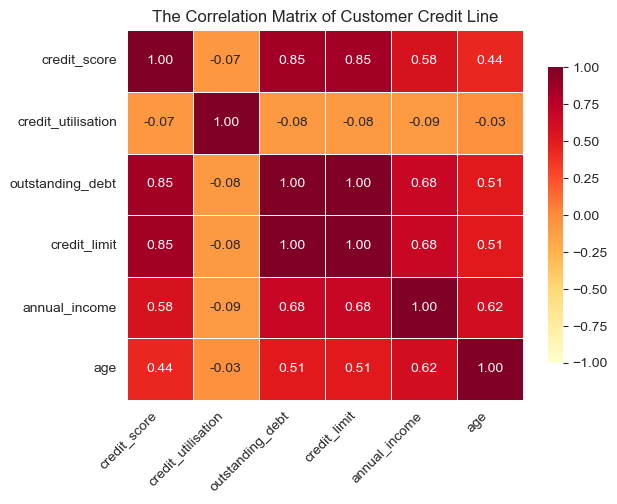

In [85]:
sns.heatmap(
    correlation_matrix, annot=True, fmt=".2f", cmap='YlOrRd',
    linewidths=0.5, vmin=-1, vmax=1, cbar_kws={'shrink': .8}
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('The Correlation Matrix of Customer Credit Line')
plt.show()
# cmap : YlOrRd, YlGnBu, hot, coolwarm, magma and inferno

### <center>Analyze Transactions </center>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.layouts import row
from distributed.utils import palette
from pyasn1_modules.rfc2985 import gender
from sqlalchemy import custom_op

path_avg_transaction = '''/Users/ricky/Downloads/DATA ANALYST BOOSTCAMP/Booscamp DATA/Mathematic/Industry Project/Bank/datasets/avg_transactions_after_campaign.csv'''
path_credit_profile = '''/Users/ricky/Downloads/DATA ANALYST BOOSTCAMP/Booscamp DATA/Mathematic/Industry Project/Bank/datasets/credit_profiles.csv'''
path_customers = '/Users/ricky/Downloads/DATA ANALYST BOOSTCAMP/Booscamp DATA/Mathematic/Industry Project/Bank/datasets/customers.csv'
path_transactions = '''/Users/ricky/Downloads/DATA ANALYST BOOSTCAMP/Booscamp DATA/Mathematic/Industry Project/Bank/datasets/transactions.csv'''
df_transactions = pd.read_csv(path_transactions)
df_avg_transactions = pd.read_csv(path_avg_transaction)
df_credit_profile = pd.read_csv(path_credit_profile)
df_customers = pd.read_csv(path_customers)

In [87]:
df_transactions.shape

(500000, 7)

In [88]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   tran_id           500000 non-null  int64 
 1   cust_id           500000 non-null  int64 
 2   tran_date         500000 non-null  object
 3   tran_amount       500000 non-null  int64 
 4   platform          495059 non-null  object
 5   product_category  500000 non-null  object
 6   payment_type      500000 non-null  object
dtypes: int64(3), object(4)
memory usage: 26.7+ MB


In [89]:
df_transactions.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


#### check null value

In [90]:
df_transactions.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [91]:
df_transactions[df_transactions['platform'].isnull()].shape

(4941, 7)

In [92]:
df_transactions['platform'].unique()

array(['Flipkart', 'Alibaba', 'Shopify', 'Amazon', 'Ebay', 'Meesho',
       'Cred', nan], dtype=object)

In [93]:
platform_count = df_transactions['platform'].value_counts().reset_index().sort_values('count', ascending=False)
platform_count

,platform,count
0,Amazon,151443
1,Flipkart,122660
2,Alibaba,73584
3,Meesho,73271
4,Shopify,39416
5,Cred,24741
6,Ebay,9944


<Axes: xlabel='count', ylabel='platform'>

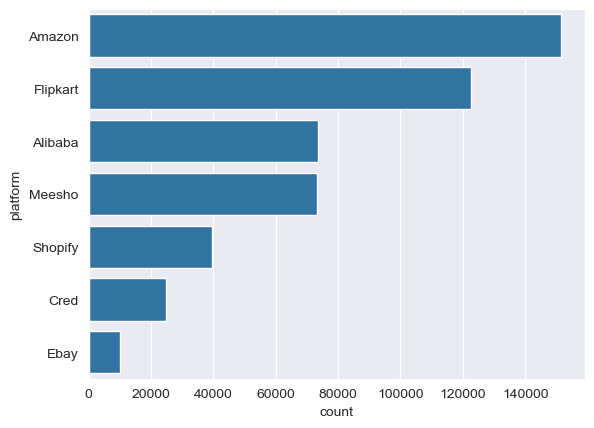

In [94]:
sns.barplot(platform_count, y = 'platform', x = 'count')

#### We may see the most platform user using is Amazon, so that for 4941 N/A value, we're going to replace by Amazon

In [95]:
df_transactions['platform']=df_transactions['platform'].fillna('Amazon')

In [96]:
df_transactions.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

### Check outliers 
### The project manager had confirmed the transaction amount could not be zero

In [97]:
df_transactions.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [98]:
df_trans_zero = df_transactions[df_transactions['tran_amount']==0]
df_trans_zero

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499326,499327,695,2023-09-05,0,Amazon,Electronics,Credit Card
499494,499495,295,2023-09-05,0,Amazon,Electronics,Credit Card
499708,499709,141,2023-09-05,0,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [99]:
df_trans_zero[['platform','product_category','payment_type']].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

In [100]:
# ==> The table of count value above showed us all zero amount is come from platform Amazon, product_category Electronics and payment_type Credit Card
# Get the table with 3 type of zero tran amount
df_trans_other =df_transactions[(df_transactions['product_category']=='Electronics')&(df_transactions['platform']=='Amazon')&(df_transactions['payment_type']=='Credit Card')]
df_trans_other

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499812,499813,688,2023-09-05,425,Amazon,Electronics,Credit Card
499860,499861,373,2023-09-05,480,Amazon,Electronics,Credit Card
499885,499886,520,2023-09-05,643,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [101]:
df_trans_other_non_zero=df_trans_other[df_trans_other['tran_amount']>0]
df_trans_other_non_zero

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card
263,264,528,2023-01-01,421,Amazon,Electronics,Credit Card
311,312,936,2023-01-01,537,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499766,499767,723,2023-09-05,909,Amazon,Electronics,Credit Card
499793,499794,586,2023-09-05,304,Amazon,Electronics,Credit Card
499812,499813,688,2023-09-05,425,Amazon,Electronics,Credit Card
499860,499861,373,2023-09-05,480,Amazon,Electronics,Credit Card


In [102]:
tran_median = df_trans_other_non_zero['tran_amount'].median()
tran_median

554.0

In [103]:
df_transactions['tran_amount']=df_transactions['tran_amount'].replace(0,tran_median)

In [104]:
df_transactions[df_transactions['tran_amount']==0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


In [105]:
df_transactions.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711634,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


### Check outliers tran_amount column

<Axes: xlabel='tran_amount', ylabel='Count'>

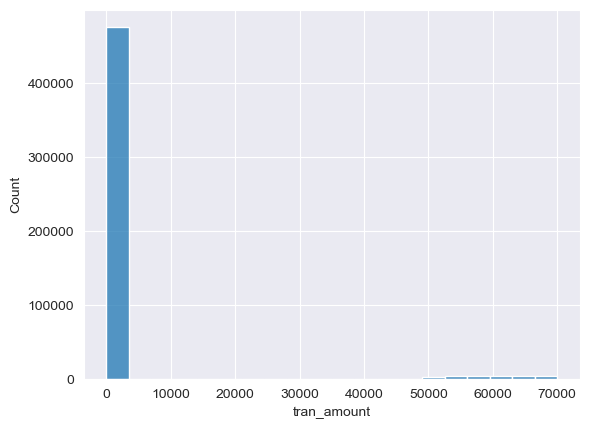

In [106]:
sns.histplot(df_transactions['tran_amount'], bins=20)

#### Try to check if tran amout < 10000 and get the idea of skewed right.

<Axes: xlabel='tran_amount', ylabel='Count'>

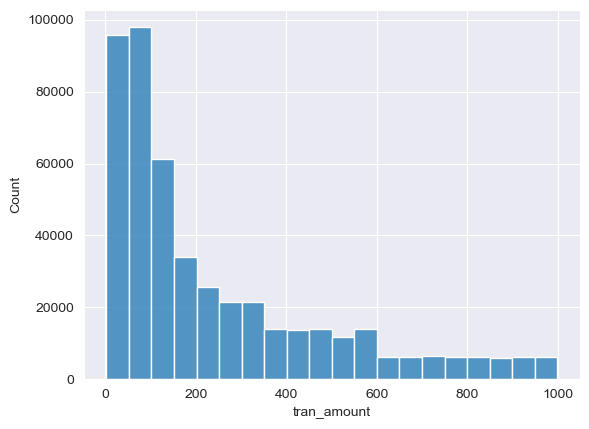

In [107]:
sns.histplot(df_transactions[df_transactions['tran_amount']<10000].tran_amount, bins= 20)

#### Because of skewed right, we will determine the outliers by IQR

In [108]:
Q1 = df_transactions['tran_amount'].quantile(0.25)
Q3 = df_transactions['tran_amount'].quantile(0.75)
IQR = Q3 - Q1
IQR

347.0

In [109]:
higher_limit_IQR = Q3 + 2*IQR
higher_limit_IQR

1107.0

#### Check outliers

In [110]:
df_transactions[df_transactions['tran_amount']>higher_limit_IQR].shape

(25000, 7)

In [111]:
df_transactions[df_transactions['tran_amount']>higher_limit_IQR]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


#### Get median of product category to clarify median tran_amount of each

In [112]:
df_get_median_product = df_transactions.groupby('product_category')['tran_amount'].median()
df_get_median_product

product_category
Beauty & Personal Care     97.0
Books                      31.0
Electronics               554.0
Fashion & Apparel          68.0
Garden & Outdoor          132.0
Home Decor                319.0
Kitchen Appliances        186.0
Sports                    283.0
Toys & Games               53.0
Name: tran_amount, dtype: float64

#### Solution 1

In [113]:
df_transactions['tran_amount'] = df_transactions.apply(lambda row: df_get_median_product[row['product_category']] 
                                                       if row['tran_amount']>higher_limit_IQR
                                                       else row['tran_amount'] , axis=1)                                                          

In [114]:
# Check if any outliers which higher than limit 
df_transactions[df_transactions['tran_amount']>higher_limit_IQR]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


In [115]:
df_transactions.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,241.534922
std,144337.711634,288.641924,242.364496
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,133.000000
75%,375000.250000,752.000000,349.000000
max,500000.000000,1000.000000,999.000000


In [116]:
df_transactions.shape

(500000, 7)

#### Visualization transaction for checking tran_amount

<Axes: xlabel='tran_amount', ylabel='Count'>

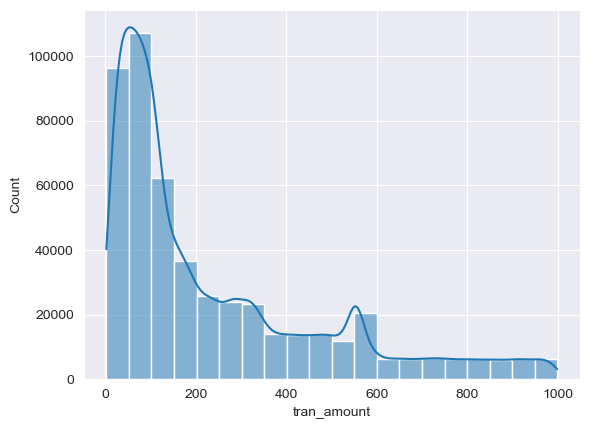

In [117]:
sns.histplot(df_transactions['tran_amount'], kde=True, bins=20)

#### Visualization Transactions 

<Axes: xlabel='payment_type', ylabel='count'>

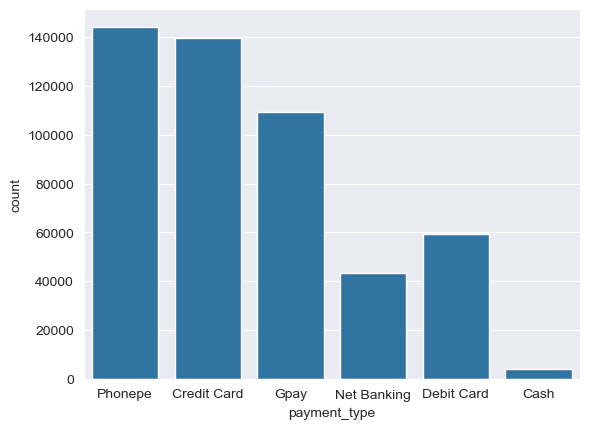

In [118]:
sns.countplot(x = df_transactions['payment_type'])    

### Determine the distribution of age with payment type

In [143]:
df_customers.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [145]:
df_transactions.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33.0,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68.0,Amazon,Fashion & Apparel,Net Banking


In [144]:
df_customer_transaction_merge = pd.merge(df_customers, df_transactions, on='cust_id', how='inner')
df_customer_transaction_merge.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay
3,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,1576,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card


In [146]:
df_customer_transaction_merge.describe()

,cust_id,age,annual_income,tran_id,tran_amount
count,500000.000000,500000.000000,475010.000000,500000.000000,500000.000000
mean,501.400428,35.560216,139690.179607,250000.500000,241.534922
std,288.641924,12.267277,112454.252360,144337.711634,242.364496
min,1.000000,18.000000,2.000000,1.000000,2.000000
25%,252.000000,26.000000,47665.000000,125000.750000,66.000000
50%,502.000000,32.000000,112754.000000,250000.500000,133.000000
75%,752.000000,45.000000,194922.000000,375000.250000,349.000000
max,1000.000000,64.000000,449346.000000,500000.000000,999.000000


#### Visualize tran amount with age group

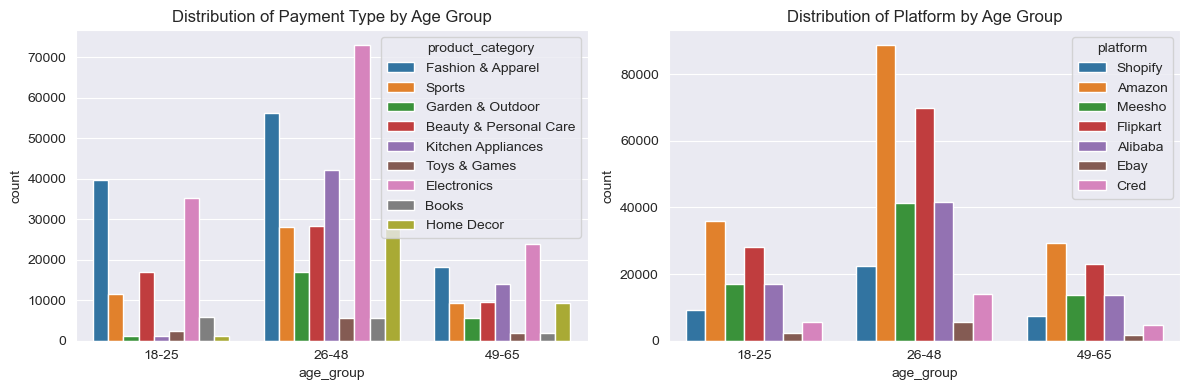

In [153]:

# Set up the number of rows and columns for subplots (1x2 grid in this case)
n_rows = 1
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4))

# Plot the first list in the first subplot
sns.countplot(
    data=df_customer_transaction_merge,
    x='age_group',
    # y='tran_amount',
    hue='product_category',  # Add hue for age group comparison
    palette='tab10',
    ax=axes[0]
)
axes[0].set_title('Distribution of Payment Type by Age Group')
# axes[0].tick_params(axis='x', rotation=45)

# Plot the second list in the second subplot
sns.countplot(
    data=df_customer_transaction_merge,
    x='age_group',
    # y='tran_amount',
    hue='platform',  # Add hue for age group comparison
    palette='tab10',
    ax=axes[1]
    
)
axes[1].set_title('Distribution of Platform by Age Group')
# axes[1].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [450]:
df_customer_transaction_merge.columns

Index(['cust_id', 'name', 'gender', 'age', 'location', 'occupation',
       'annual_income', 'marital_status', 'age_group', 'tran_id', 'tran_date',
       'tran_amount', 'platform', 'product_category', 'payment_type'],
      dtype='object')

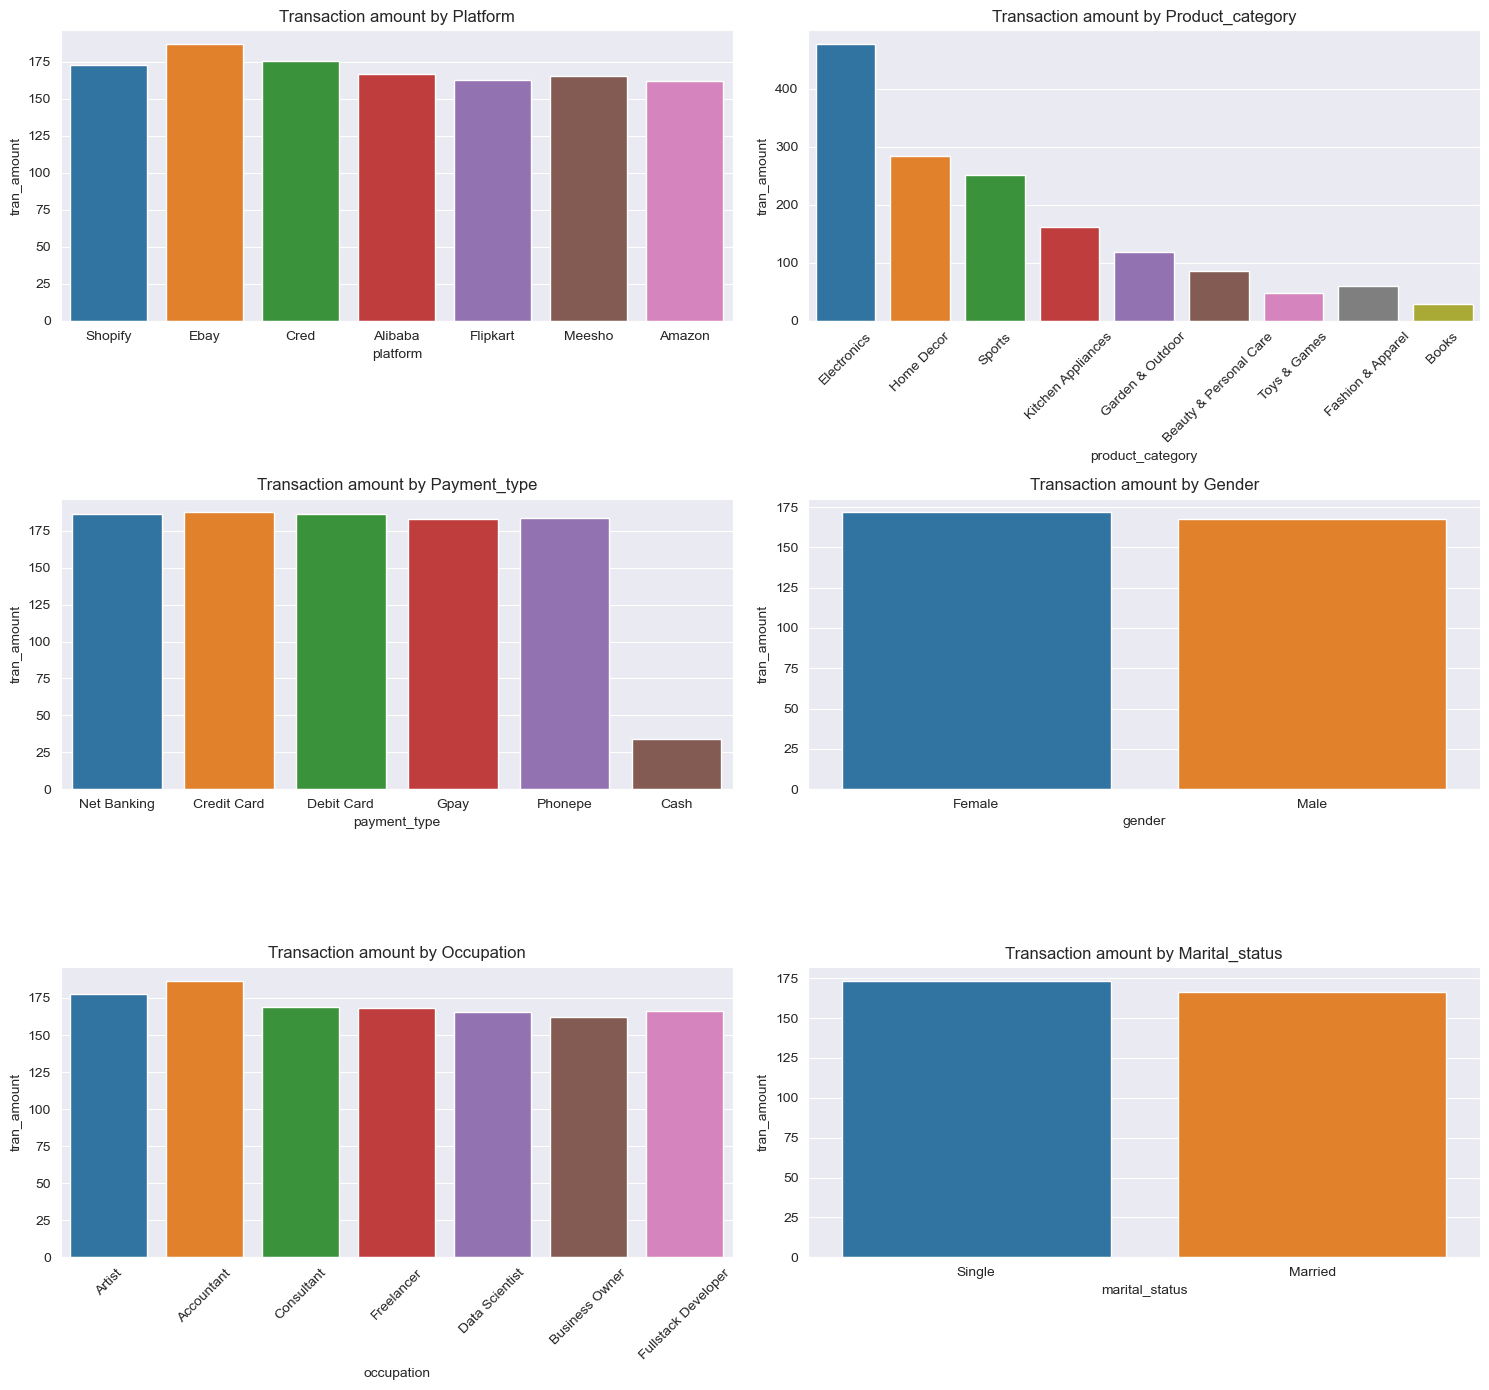

In [503]:
factor_2 = ['platform', 'product_category', 'payment_type','gender','occupation','marital_status']
n_rows = 3
n_cols = 2
fig2, axes = plt.subplots(n_rows, n_cols, figsize=(15, 14))
axes = axes.flatten()
df_get_all_chart = df_customer_transaction_merge.groupby(factor_2)['tran_amount'].mean().reset_index().sort_values('tran_amount', ascending=False)
# Plot the first list in the first subplot
for idx, factor in enumerate(factor_2):
    sns.barplot(
        data=df_get_all_chart,
        x=factor,
        y='tran_amount',
        hue=factor,
        # palette='tab10',
        errorbar=None,
        ax=axes[idx],
        legend=False
    )
    axes[idx].set_title(f"Transaction amount by {factor.capitalize()}")
    if factor == 'product_category':
        axes[idx].tick_params(axis='x', rotation=45)
    if factor == 'occupation':
        axes[idx].tick_params(axis='x', rotation=45)
    # axes[idx].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

#### Analyze more about the connection of age group with annual income, credit limit, credit score

In [500]:
df_customer_credit_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_range
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,40000.0,0.0,40000.0,700-749
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,1000.0,4.0,1000.0,500-549
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,1000.0,2.0,1000.0,500-549
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,40000.0,2.0,40000.0,700-749


In [505]:
df_get_all_chart2 = df_customer_credit_merged.groupby('age_group',observed=False)[['annual_income','credit_score','credit_limit']].mean()
df_get_all_chart2

,annual_income,credit_score,credit_limit
age_group,,,
18-25,37111.398268,483.354978,1139.610390
26-48,145869.623457,597.569665,20560.846561
49-65,260165.925134,701.524064,41699.197861


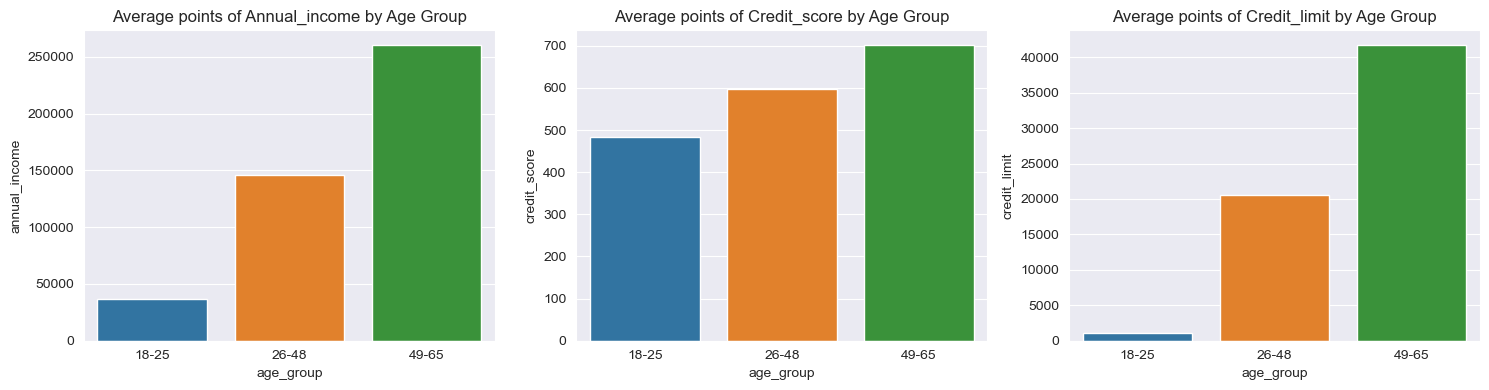

In [507]:
factor_need = ['annual_income','credit_score','credit_limit']
n_rows = 1
n_cols = 3
fig2, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4))
axes = axes.flatten()
df_get_all_chart2 = df_customer_credit_merged.groupby('age_group',observed=False)[['annual_income','credit_score','credit_limit']].mean().reset_index().sort_values(factor_need, ascending=False)
# Plot the first list in the first subplot
for idx, factor in enumerate(factor_need):
    sns.barplot(
        data=df_get_all_chart2,
        x='age_group',
        y=factor,
        hue='age_group',
        palette='tab10',
        errorbar=None,
        ax=axes[idx],
        legend=False
    )
    axes[idx].set_title(f"Average points of {factor.capitalize()} by Age Group")
    # if factor == 'product_category':
    #     axes[idx].tick_params(axis='x', rotation=45)
    # axes[idx].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


#### Look at the chart above, we may see the group from 18-25 has pretty small points of annual income, Credit score and Credit limit. About other age group, they already had the utilise of others credit company bank, so that it's quite hard to convince them to switch to different bank. And it's pretty hard for the age group from 49-65 also because this period age are lightly dont want to change. 
#### Conclusion , we may have plans to target to 18-25 age group instead because they may not have any credit card by above reasons. That's really a blue ocean because the population of this age group is pretty huge. We may get a various of members from this group if we have a good offer. 